In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label.xlsx')
print(df)
df = df.loc[df['anomaly'] == 0]
print(df)

X = df[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df['employee_role']

scaler = StandardScaler()

scaler.fit(X)

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

bern_nb = Pipeline([('scale', StandardScaler()), ("bernoulli nb", BernoulliNB())])
mult_nb = Pipeline([('scale', StandardScaler()), ("multinomial nb", MultinomialNB())])
svm = Pipeline([('scale', StandardScaler()), ("linear svc", SVC(kernel='linear', probability=True))])
nn = Pipeline([('scale', StandardScaler()), ("neural network", MLPClassifier())])
knn = Pipeline([('scale', StandardScaler()), ("multinomial nb",  KNeighborsClassifier(5))])
lr = Pipeline([('scale', StandardScaler()), ("multinomial nb",  LogisticRegression())])
rf = Pipeline([('scale', StandardScaler()), ("multinomial nb", RandomForestClassifier())])
dt = Pipeline([('scale', StandardScaler()), ("multinomial nb", DecisionTreeClassifier())])

all_models = [
    ("mult_nb", mult_nb),
    ("bern_nb", bern_nb),
    ("nn", nn),
    ("knn", knn),
    ("lr", lr),
    ("rf", rf),
    ("dt", dt),
    ("svm", svm)
]

for name, model in all_models: 
  clf=model
  print(name)
  scoring = ['precision_macro', 'recall_macro', 'f1_macro']
  scores = cross_validate(clf, X, y, cv=5)
  print(scores)
  print(sum(scores['test_score'])/len(scores['test_score']))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                      0        0
1          emp_0  28/01  ...                      0        0
2          emp_0  03/02  ...                      0        0
3          emp_0  03/03  ...                      0        0
4          emp_0  01/04  ...                      0        0
...          ...    ...  ...                    ...      ...
24970     emp_99  22/12  ...                      0        0
24971     emp_99  24/12  ...                      0        0
24972     emp_99  26/12  ...                      0        0
24973     emp_99  28/12  ...                      0        0
24974     emp_99  30/12  ...                      0        0

[24975 rows x 24 columns]
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                     

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFa

{'fit_time': array([0.07033968, 0.07470894, 0.0707016 , 0.07417274, 0.07060432]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([nan, nan, nan, nan, nan])}
nan
bern_nb
{'fit_time': array([0.07642603, 0.12828898, 0.12769222, 0.12947488, 0.12741971]), 'score_time': array([0.01100111, 0.01099944, 0.01072145, 0.01142669, 0.01150799]), 'test_score': array([0.61907643, 0.7424884 , 0.83323251, 0.80617184, 0.6641791 ])}
0.7330296572271815
nn
{'fit_time': array([21.86573672, 27.17795157, 21.62043715, 21.2424624 , 30.21689272]), 'score_time': array([0.01900387, 0.01864386, 0.01850796, 0.01907754, 0.0184443 ]), 'test_score': array([0.8215366 , 0.83867715, 0.83686227, 0.96530859, 0.96732553])}
0.885942030011158
knn
{'fit_time': array([0.72833085, 0.73178506, 0.69461131, 0.69929218, 0.71120572]), 'score_time': array([0.79175067, 0.76013637, 0.9396553 , 0.99736524, 0.96187043]), 'test_score': array([0.79310345, 0.79270014, 0.86872353, 0.99475595, 0.99415087])}
0.8886867879337472
lr


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([3.0629189 , 3.14633584, 3.02397108, 3.14206338, 3.40434027]), 'score_time': array([0.01197028, 0.01211333, 0.01159716, 0.01243591, 0.01210093]), 'test_score': array([0.80338778, 0.79128857, 0.86630369, 0.97156111, 0.96450182])}
0.8794085929795765
rf
{'fit_time': array([0.90396833, 0.88725305, 0.89258504, 0.86076355, 0.84332156]), 'score_time': array([0.08898926, 0.09173083, 0.08689976, 0.08220625, 0.08019638]), 'test_score': array([0.82113329, 0.83807219, 0.83726558, 0.96470351, 0.96752723])}
0.8857403601830288
dt
{'fit_time': array([0.0553391 , 0.0637877 , 0.06829453, 0.05551267, 0.05383873]), 'score_time': array([0.00703883, 0.00774074, 0.00707388, 0.0068295 , 0.00680256]), 'test_score': array([0.82093164, 0.83787054, 0.83726558, 0.96409843, 0.96631706])}
0.8852966491425738
svm
{'fit_time': array([28.53092241, 31.2775116 , 22.27509141, 37.50939298, 36.83894801]), 'score_time': array([0.92581177, 0.94062519, 0.8475616 , 1.20866942, 1.19976401]), 'test_score': array

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df)
df = df.loc[df['anomaly'] == 0]
print(df)

X = df[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df['employee_role']
param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]


mult_nb = Pipeline([('scale', StandardScaler()), ("multinomial nb", MultinomialNB())])
bern_nb = Pipeline([('scale', StandardScaler()), ("bernoulli nb", BernoulliNB())])
svm = Pipeline([('scale', StandardScaler()), ("linear svc", SVC(kernel='linear', probability=True))])
nn = Pipeline([('scale', StandardScaler()), ("neural network", MLPClassifier())])
knn = Pipeline([('scale', StandardScaler()), ("multinomial nb",  KNeighborsClassifier(5))])
lr = Pipeline([('scale', StandardScaler()), ("multinomial nb",  LogisticRegression())])
rf = Pipeline([('scale', StandardScaler()), ("multinomial nb", RandomForestClassifier())])
dt = Pipeline([('scale', StandardScaler()), ("multinomial nb", DecisionTreeClassifier())])

all_models = [
    ("mult_nb", mult_nb),
    ("bern_nb", bern_nb),
    ("nn", nn),
    ("knn", knn),
    ("lr", lr),
    ("rf", rf),
    ("dt", dt),
    ("svm", svm)
]

for name, model in all_models: 
  clf=model
  #print(name)
  #result = cross_val_predict(clf, X, y, cv=5) # 5-fold Cross Validation
  #conf_mat = confusion_matrix(y, result)
  #print(conf_mat)
  #print("Precision Score : ",precision_score(y, result, average='micro'))
  #print("Recall Score : ",recall_score(y, result, average='micro'))
  #scoring = ['precision_macro', 'recall_macro', 'f1_macro']
  scores = cross_validate(clf, X, y, cv=5)
  #print(scores)
  print(name + '&' + str(sum(scores['test_score'])/len(scores['test_score']))+'\\\\')
  #print(sum(scores['test_score'])/len(scores['test_score']))
  #cross_val_score(clf, X, y, cv=5, scoring='precision_macro')

  #print(cross_val_score(clf, X, y, cv=5, scoring='recall_macro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='precision_micro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='recall_micro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='f1_macro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='f1_micro'))
  


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                      0        0
1          emp_0  03/02  ...                      0        0
2          emp_0  05/02  ...                      0        0
3          emp_0  13/02  ...                      0        0
4          emp_0  03/03  ...                      0        0
...          ...    ...  ...                    ...      ...
24643     emp_99  22/12  ...                      0        0
24644     emp_99  24/12  ...                      0        0
24645     emp_99  26/12  ...                      0        0
24646     emp_99  28/12  ...                      0        0
24647     emp_99  30/12  ...                      0        0

[24648 rows x 24 columns]
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                     

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFa

mult_nb&nan\\
bern_nb&0.7326488073517673\\


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nn&0.8682382250096692\\
knn&0.8647397495078046\\


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lr&0.8793166827334217\\
rf&0.8892388341986326\\
dt&0.8889505734742326\\
svm&0.8748698575894712\\


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df)
df = df.loc[df['anomaly'] == 0]
print(df)

X = df[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df['employee_role']
param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

bern_nb = Pipeline([('scale', MinMaxScaler()), ("bernoulli nb", BernoulliNB())])
mult_nb = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", MultinomialNB())])
svm = Pipeline([('scale', MinMaxScaler()), ("linear svc", SVC(kernel='linear', probability=True))])
nn = Pipeline([('scale', MinMaxScaler()), ("neural network", MLPClassifier())])
knn = Pipeline([('scale', MinMaxScaler()), ("multinomial nb",  KNeighborsClassifier(5))])
lr = Pipeline([('scale', MinMaxScaler()), ("multinomial nb",  LogisticRegression())])
rf = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", RandomForestClassifier())])
dt = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", DecisionTreeClassifier())])

all_models = [
    ("mult_nb", mult_nb),
    ("bern_nb", bern_nb),
    ("nn", nn),
    ("knn", knn),
    ("lr", lr),
    ("rf", rf),
    ("dt", dt),
    ("svm", svm)
]

for name, model in all_models: 
  clf=model
  #print(name)
  #result = cross_val_predict(clf, X, y, cv=5) # 5-fold Cross Validation
  #conf_mat = confusion_matrix(y, result)
  #print(conf_mat)
  #print("Precision Score : ",precision_score(y, result, average='micro'))
  #print("Recall Score : ",recall_score(y, result, average='micro'))
  #scoring = ['precision_macro', 'recall_macro', 'f1_macro']
  scores = cross_validate(clf, X, y, cv=5)
  #print(scores)
  print(name + '&' + str(sum(scores['test_score'])/len(scores['test_score']))+'\\\\')
  #print(sum(scores['test_score'])/len(scores['test_score']))
  #cross_val_score(clf, X, y, cv=5, scoring='precision_macro')

  #print(cross_val_score(clf, X, y, cv=5, scoring='recall_macro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='precision_micro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='recall_micro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='f1_macro'))
  #print(cross_val_score(clf, X, y, cv=5, scoring='f1_micro'))
  


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                      0        0
1          emp_0  03/02  ...                      0        0
2          emp_0  05/02  ...                      0        0
3          emp_0  13/02  ...                      0        0
4          emp_0  03/03  ...                      0        0
...          ...    ...  ...                    ...      ...
24643     emp_99  22/12  ...                      0        0
24644     emp_99  24/12  ...                      0        0
24645     emp_99  26/12  ...                      0        0
24646     emp_99  28/12  ...                      0        0
24647     emp_99  30/12  ...                      0        0

[24648 rows x 24 columns]
      employeeID   date  ... number_of_otherbrowser  anomaly
0          emp_0  01/01  ...                     

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nn&0.8784109941189151\\
knn&0.888044520380452\\


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lr&0.8516052896283692\\
rf&0.8891976565169359\\
dt&0.8888682181108395\\
svm&0.8620639884899142\\


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df['date'])
df['month']=df['date'].apply(lambda x: int(x.split('/')[1]))
print(df['month'])

df_first = df.loc[df['month'] <= 8]
print('training all: '+str(df_first.shape[0]))
df_training = df_first.loc[df_first['anomaly'] == 0]
print(df_training.shape[0])

df_testing = df.loc[df['month'] > 8]
print(df_testing.shape[0])

df_testing_anomaly = df.loc[df['anomaly'] == 1]
print(df_testing_anomaly.shape[0])

X = df_training[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df_training['employee_role']

S = df_testing[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
t = df_testing['employee_role'].values.tolist()


anomaly_list = df_testing['anomaly'].values.tolist()

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

bern_nb = Pipeline([('scale', StandardScaler()), ("bernoulli nb", BernoulliNB())])
mult_nb = Pipeline([('scale', StandardScaler()), ("multinomial nb", MultinomialNB())])
svm = Pipeline([('scale', StandardScaler()), ("linear svc", SVC(kernel='linear', probability=True))])
nn = Pipeline([('scale', StandardScaler()), ("neural network", MLPClassifier())])
knn = Pipeline([('scale', StandardScaler()), ("multinomial nb",  KNeighborsClassifier(5))])
lr = Pipeline([('scale', StandardScaler()), ("multinomial nb",  LogisticRegression())])
rf = Pipeline([('scale', StandardScaler()), ("multinomial nb", RandomForestClassifier())])
dt = Pipeline([('scale', StandardScaler()), ("multinomial nb", DecisionTreeClassifier())])

all_models = [
    ("bern_nb", bern_nb),
    ("nn", nn),
    ("knn", knn),
    ("lr", lr),
    ("rf", rf),
    ("dt", dt),
    ("svm", svm)
]

for name, model in all_models: 
  clf=model
  #print(name)
  clf.fit(X, y)
  result = clf.predict(S)
  #print(result)
  idx=0
  tp=0
  tn=0
  fp=0
  fn=0
  for res in result:
    if(res==t[idx]):
      if(anomaly_list[idx]==0):
        tn=tn+1
      else:
        fn=fn+1
    else:
      if(anomaly_list[idx]==1):
        tp=tp+1
      else:
        fp=fp+1
    idx=idx+1
  acc = float ((tp+tn)/(tp+tn+fp+fn))
  prec = float (tp/(tp+fp))
  rec =  float (tp/(tp+fn))
  f1=2*prec*rec/(prec+rec)
  print(name+' & '+ str(acc) + ' & ' +str(prec)+ ' & ' +str(rec)+ ' & ' +str(f1)+ '\\\\')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0        01/01
1        03/02
2        05/02
3        13/02
4        03/03
         ...  
24643    22/12
24644    24/12
24645    26/12
24646    28/12
24647    30/12
Name: date, Length: 24648, dtype: object
0         1
1         2
2         2
3         2
4         3
         ..
24643    12
24644    12
24645    12
24646    12
24647    12
Name: month, Length: 24648, dtype: int64
training all: 16512
16203
8136
362
bern_nb & 0.727630285152409 & 0.020399113082039913 & 0.8679245283018868 & 0.03986135181975737\\
nn & 0.9138397246804326 & 0.04874651810584958 & 0.660377358490566 & 0.0907911802853437\\
knn & 0.8926991150442478 & 0.0319634703196347 & 0.5283018867924528 & 0.060279870828848225\\


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr & 0.8788102261553589 & 0.0254323499491353 & 0.4716981132075472 & 0.04826254826254827\\
rf & 0.913102261553589 & 0.04073033707865169 & 0.5471698113207547 & 0.0758169934640523\\
dt & 0.9137168141592921 & 0.049930651872399444 & 0.6792452830188679 & 0.09302325581395349\\
svm & 0.8887659783677483 & 0.02348993288590604 & 0.39622641509433965 & 0.044350580781414996\\


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df['date'])
df['month']=df['date'].apply(lambda x: int(x.split('/')[1]))
print(df['month'])

df_first = df.loc[df['month'] <= 8]
print('training all: '+str(df_first.shape[0]))
df_training = df_first.loc[df_first['anomaly'] == 0]
print(df_training.shape[0])

df_testing = df.loc[df['month'] > 8]
print(df_testing.shape[0])

df_testing_anomaly = df.loc[df['anomaly'] == 1]
print(df_testing_anomaly.shape[0])

X = df_training[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df_training['employee_role']

S = df_testing[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
t = df_testing['employee_role'].values.tolist()


anomaly_list = df_testing['anomaly'].values.tolist()

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

bern_nb = Pipeline([('scale', MinMaxScaler()), ("bernoulli nb", BernoulliNB())])
mult_nb = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", MultinomialNB())])
svm = Pipeline([('scale', MinMaxScaler()), ("linear svc", SVC(kernel='linear', probability=True))])
nn = Pipeline([('scale', MinMaxScaler()), ("neural network", MLPClassifier())])
knn = Pipeline([('scale', MinMaxScaler()), ("multinomial nb",  KNeighborsClassifier(5))])
lr = Pipeline([('scale', MinMaxScaler()), ("multinomial nb",  LogisticRegression())])
rf = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", RandomForestClassifier())])
dt = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", DecisionTreeClassifier())])

all_models = [
    ("mult_nb", mult_nb),
    ("bern_nb", bern_nb),
    ("nn", nn),
    ("knn", knn),
    ("lr", lr),
    ("rf", rf),
    ("dt", dt),
    ("svm", svm)
]


for name, model in all_models: 
  clf=model
  #print(name)
  clf.fit(X, y)
  result = clf.predict(S)
  #print(result)
  idx=0
  tp=0
  tn=0
  fp=0
  fn=0
  for res in result:
    if(res==t[idx]):
      if(anomaly_list[idx]==0):
        tn=tn+1
      else:
        fn=fn+1
    else:
      if(anomaly_list[idx]==1):
        tp=tp+1
      else:
        fp=fp+1
    idx=idx+1
  acc = float ((tp+tn)/(tp+tn+fp+fn))
  prec = float (tp/(tp+fp))
  rec =  float (tp/(tp+fn))
  f1=2*prec*rec/(prec+rec)
  print(name+' & '+ str(acc) + ' & ' +str(prec)+ ' & ' +str(rec)+ ' & ' +str(f1)+ '\\\\')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0        01/01
1        03/02
2        05/02
3        13/02
4        03/03
         ...  
24643    22/12
24644    24/12
24645    26/12
24646    28/12
24647    30/12
Name: date, Length: 24648, dtype: object
0         1
1         2
2         2
3         2
4         3
         ..
24643    12
24644    12
24645    12
24646    12
24647    12
Name: month, Length: 24648, dtype: int64
training all: 16512
16203
8136
362
mult_nb & 0.7150934119960669 & 0.01910828025477707 & 0.8490566037735849 & 0.03737541528239202\\
bern_nb & 0.7763028515240905 & 0.02474448628294782 & 0.8679245283018868 & 0.04811715481171548\\


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nn & 0.9095378564405113 & 0.03913630229419703 & 0.5471698113207547 & 0.07304785894206549\\
knn & 0.9126106194690266 & 0.040502793296089384 & 0.5471698113207547 & 0.0754226267880364\\


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lr & 0.846976401179941 & 0.009060955518945634 & 0.20754716981132076 & 0.017363851617995262\\
rf & 0.913102261553589 & 0.04073033707865169 & 0.5471698113207547 & 0.0758169934640523\\
dt & 0.9134709931170109 & 0.04979253112033195 & 0.6792452830188679 & 0.09278350515463916\\
svm & 0.8565634218289085 & 0.007079646017699115 & 0.1509433962264151 & 0.013524936601859678\\


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df['date'])
df['month']=df['date'].apply(lambda x: int(x.split('/')[1]))
print(df['month'])

df_first = df.loc[df['month'] <= 8]
print(df_first)
df_training = df_first.loc[df_first['anomaly'] == 0]
print(df_training)

df_testing = df.loc[df['month'] > 8]
print(df_testing)

X = df_training[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df_training['employee_role']

S = df_testing[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
t = df_testing['employee_role'].values.tolist()


anomaly_list = df_testing['anomaly'].values.tolist()

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

bern_nb = Pipeline([('scale', StandardScaler()), ("bernoulli nb", BernoulliNB())])
mult_nb = Pipeline([('scale', StandardScaler()), ("multinomial nb", MultinomialNB())])
svm = Pipeline([('scale', StandardScaler()), ("linear svc", SVC(kernel='linear', probability=True))])
nn = Pipeline([('scale', StandardScaler()), ("neural network", MLPClassifier())])
knn = Pipeline([('scale', StandardScaler()), ("multinomial nb",  KNeighborsClassifier(5))])
lr = Pipeline([('scale', StandardScaler()), ("multinomial nb",  LogisticRegression())])
rf = Pipeline([('scale', StandardScaler()), ("multinomial nb", RandomForestClassifier())])
dt = Pipeline([('scale', StandardScaler()), ("multinomial nb", DecisionTreeClassifier())])

all_models = [
    ("bern_nb", bern_nb),
    ("nn", nn),
    ("knn", knn),
    ("lr", lr),
    ("rf", rf),
    ("dt", dt),
    ("svm", svm)
]

th_list = np.arange(0.05, 1.0, 0.05)
print(th_list)
allacc_list=[]
allprec_list=[]
allrec_list=[]
allf1_list=[]
allth_list=[]

for name, model in all_models: 
  clf=model
  #print(name)
  clf.fit(X, y)
  result = clf.predict_proba(S)
  #print(result)
  
  list_class = clf.classes_.tolist()
  acc_list=[]
  prec_list=[]
  rec_list=[]
  f1_list=[]
  for threshold in th_list:
    idx=0
    tp=0
    tn=0
    fp=0
    fn=0
    for res in result:
      if(res[list_class.index(t[idx])]>threshold):
        if(anomaly_list[idx]==0):
          tn=tn+1
        else:
          fn=fn+1
      else:
        if(anomaly_list[idx]==1):
          tp=tp+1
        else:
          fp=fp+1
      idx=idx+1
    acc = float ((tp+tn)/(tp+tn+fp+fn))
    prec = float (tp/(tp+fp))
    rec =  float (tp/(tp+fn))
    f1=2*prec*rec/(prec+rec)
    #print(name+' & '+ str(acc) + ' & ' +str(prec)+ ' & ' +str(rec)+ ' & ' +str(f1)+ '\\\\')
    #th_list.append(threshold)
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)
  allacc_list.append(acc_list)
  allprec_list.append(prec_list)
  allrec_list.append(rec_list)
  allf1_list.append(f1_list) 
  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0        01/01
1        03/02
2        05/02
3        13/02
4        03/03
         ...  
24643    22/12
24644    24/12
24645    26/12
24646    28/12
24647    30/12
Name: date, Length: 24648, dtype: object
0         1
1         2
2         2
3         2
4         3
         ..
24643    12
24644    12
24645    12
24646    12
24647    12
Name: month, Length: 24648, dtype: int64
      employeeID   date employee_role  ...  number_of_otherbrowser  anomaly  month
0          emp_0  01/01    Head of IT  ...                       0        0      1
1          emp_0  03/02    Head of IT  ...                       0        0      2
2          emp_0  05/02    Head of IT  ...                       0        0      2
3          emp_0  13/02    Head of IT  ...                       0        0      2
4          emp_0  03/03    Head of IT  ...                       0        0

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
idx=0
for name, model in all_models:
  print(name + '&'+ str(allf1_list[idx][1]))
  idx+=1

bern_nb&0.09090909090909091
nn&0.5483870967741935
knn&0.04561003420752566
lr&0.20618556701030932
rf&0.3770491803278688
dt&0.48226950354609927
svm&0.18433179723502305


In [ ]:
idx=0
for name, model in all_models:
  print(allrec_list[idx])
  idx+=1

[0.8301886792452831, 0.8301886792452831, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868, 0.8679245283018868]
[0.5094339622641509, 0.6415094339622641, 0.6415094339622641, 0.6415094339622641, 0.6415094339622641, 0.6415094339622641, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.660377358490566, 0.6792452830188679]
[0.37735849056603776, 0.37735849056603776, 0.37735849056603776, 0.5283018867924528, 0.5283018867924528, 0.5283018867924528, 0.5283018867924528, 0.5283018867924528, 0.5283018867924528, 0.5283018867924528, 0.5283018867924528, 0.5660377358490566, 0.5660

In [ ]:
idx=0
for name, model in all_models:
  print(allprec_list[idx])
  idx+=1

[0.055345911949685536, 0.048087431693989074, 0.046464646464646465, 0.032857142857142856, 0.022083533365338453, 0.022072936660268713, 0.022030651340996167, 0.022030651340996167, 0.02179062055897679, 0.02021978021978022, 0.019965277777777776, 0.019965277777777776, 0.019616204690831557, 0.0195994887089902, 0.0195994887089902, 0.01809598741148702, 0.016283185840707964, 0.015699658703071672, 0.012561441835062807]
[0.5, 0.4788732394366197, 0.12408759124087591, 0.08395061728395062, 0.07640449438202247, 0.05872193436960276, 0.05843071786310518, 0.05737704918032787, 0.04847645429362881, 0.04847645429362881, 0.04847645429362881, 0.038002171552660155, 0.03779697624190065, 0.03528225806451613, 0.027068832173240527, 0.024544179523141654, 0.01971830985915493, 0.011937244201909959, 0.011646716273050793]
[0.024271844660194174, 0.024271844660194174, 0.024271844660194174, 0.03233256351039261, 0.03233256351039261, 0.03233256351039261, 0.03233256351039261, 0.03192702394526796, 0.03192702394526796, 0.03192

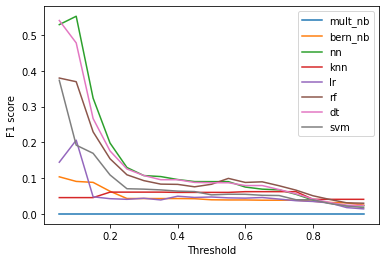

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
plt.plot(th_list, [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], label='mult_nb')
for name, model in all_models:
  plt.plot(th_list, allf1_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.show()

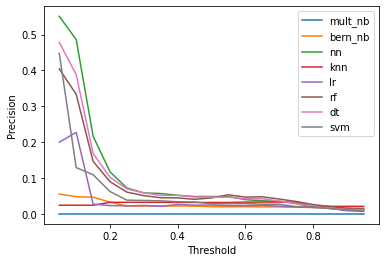

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
plt.plot(th_list, [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], label='mult_nb')
for name, model in all_models:
  plt.plot(th_list, allprec_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.show()

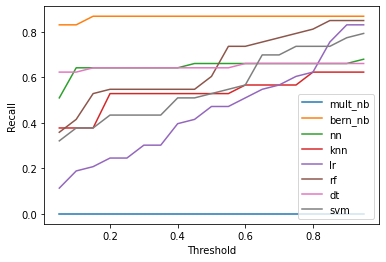

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
plt.plot(th_list, [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], label='mult_nb')
for name, model in all_models:
  plt.plot(th_list, allrec_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.show()

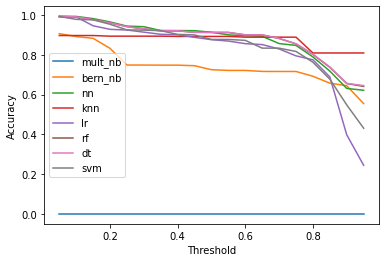

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
plt.plot(th_list, [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], label='mult_nb')
for name, model in all_models:
  plt.plot(th_list, allacc_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

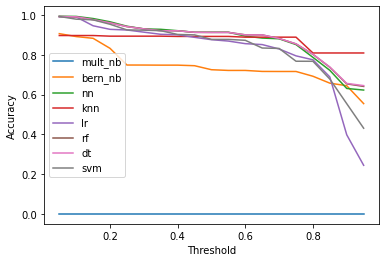

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
plt.plot(th_list, [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], label='mult_nb')
for name, model in all_models:
  plt.plot(th_list, allacc_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import pandas as pd
import csv
from google.colab import drive


from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

from google.colab import drive
drive.mount('/content/gdrive')
path_folder ="/content/gdrive/My Drive/PhD/Prosper/"

df = pd.read_excel(path_folder+'features_data_with_label_v2.xlsx')
print(df['date'])
df['month']=df['date'].apply(lambda x: int(x.split('/')[1]))
print(df['month'])

df_first = df.loc[df['month'] <= 8]
print(df_first)
df_training = df_first.loc[df_first['anomaly'] == 0]
print(df_training)

df_testing = df.loc[df['month'] > 8]
print(df_testing)

X = df_training[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
y = df_training['employee_role']

S = df_testing[['number_of_create' , 'number_of_read' , 'number_of_update' , 'number_of_delete' , 'number_of_patient_record' , 'number_of_unique_patient_record' , 'number_of_modules' , 'number_of_report_module' , 'number_of_finance_module' , 'number_of_patient_module' , 'number_of_lab_module' , 'number_of_pharmacy_module' , 'number_of_access_warning' , 'number_of_outside_access' , 'number_of_browser' , 'number_of_chrome' , 'number_of_ie' , 'number_of_safari' , 'number_of_firefox' , 'number_of_otherbrowser' , 'anomaly']]
t = df_testing['employee_role'].values.tolist()


anomaly_list = df_testing['anomaly'].values.tolist()

param_grid = [
  {'C': [1, 10, 100, 1000]}
 ]

bern_nb = Pipeline([('scale', MinMaxScaler()), ("bernoulli nb", BernoulliNB())])
mult_nb = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", MultinomialNB())])
svm = Pipeline([('scale', MinMaxScaler()), ("linear svc", SVC(kernel='linear', probability=True))])
nn = Pipeline([('scale', MinMaxScaler()), ("neural network", MLPClassifier())])
knn = Pipeline([('scale', MinMaxScaler()), ("multinomial nb",  KNeighborsClassifier(5))])
lr = Pipeline([('scale', MinMaxScaler()), ("multinomial nb",  LogisticRegression())])
rf = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", RandomForestClassifier())])
dt = Pipeline([('scale', MinMaxScaler()), ("multinomial nb", DecisionTreeClassifier())])

all_models = [
    ("mult_nb", mult_nb),
    ("bern_nb", bern_nb),
    ("nn", nn),
    ("knn", knn),
    ("lr", lr),
    ("rf", rf),
    ("dt", dt),
    ("svm", svm)
]

th_list = np.arange(0.05, 1.0, 0.05)
print(th_list)
allacc_list=[]
allprec_list=[]
allrec_list=[]
allf1_list=[]
allth_list=[]

for name, model in all_models: 
  clf=model
  #print(name)
  clf.fit(X, y)
  result = clf.predict_proba(S)
  #print(result)
  
  list_class = clf.classes_.tolist()
  acc_list=[]
  prec_list=[]
  rec_list=[]
  f1_list=[]
  for threshold in th_list:
    idx=0
    tp=0
    tn=0
    fp=0
    fn=0
    for res in result:
      if(res[list_class.index(t[idx])]>threshold):
        if(anomaly_list[idx]==0):
          tn=tn+1
        else:
          fn=fn+1
      else:
        if(anomaly_list[idx]==1):
          tp=tp+1
        else:
          fp=fp+1
      idx=idx+1
    acc = float ((tp+tn)/(tp+tn+fp+fn))
    prec = float (tp/(tp+fp))
    rec =  float (tp/(tp+fn))
    f1=2*prec*rec/(prec+rec)
    #print(name+' & '+ str(acc) + ' & ' +str(prec)+ ' & ' +str(rec)+ ' & ' +str(f1)+ '\\\\')
    #th_list.append(threshold)
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)
  allacc_list.append(acc_list)
  allprec_list.append(prec_list)
  allrec_list.append(rec_list)
  allf1_list.append(f1_list) 
  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0        01/01
1        03/02
2        05/02
3        13/02
4        03/03
         ...  
24643    22/12
24644    24/12
24645    26/12
24646    28/12
24647    30/12
Name: date, Length: 24648, dtype: object
0         1
1         2
2         2
3         2
4         3
         ..
24643    12
24644    12
24645    12
24646    12
24647    12
Name: month, Length: 24648, dtype: int64
      employeeID   date employee_role  ...  number_of_otherbrowser  anomaly  month
0          emp_0  01/01    Head of IT  ...                       0        0      1
1          emp_0  03/02    Head of IT  ...                       0        0      2
2          emp_0  05/02    Head of IT  ...                       0        0      2
3          emp_0  13/02    Head of IT  ...                       0        0      2
4          emp_0  03/03    Head of IT  ...                       0        0

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
idx=0
for name, model in all_models:
  print(int(allf1_list[idx][1]*1000))
  idx+=1

243
457
214
95
32
355
485
75


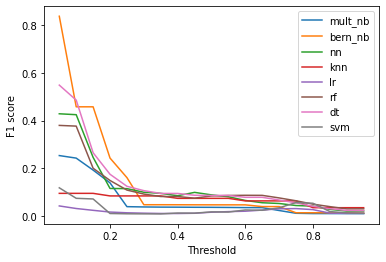

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allf1_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.show()

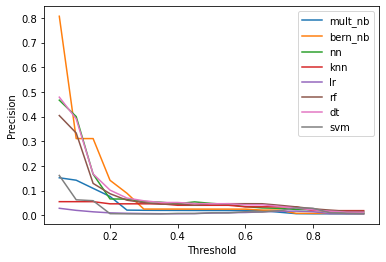

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allprec_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.show()

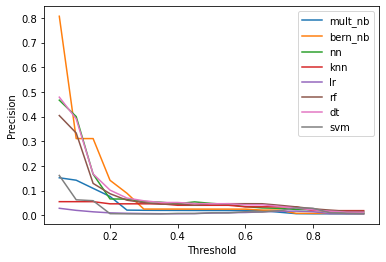

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allprec_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.show()

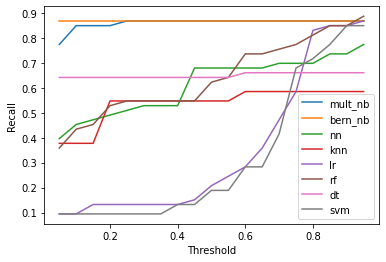

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allrec_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.show()

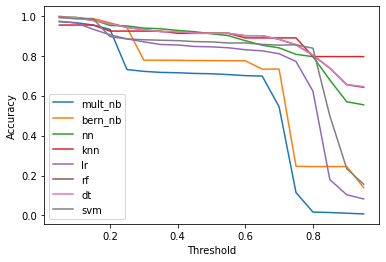

In [ ]:
from matplotlib import pyplot as plt
#print(th_list)
idx=0
for name, model in all_models:
  plt.plot(th_list, allacc_list[idx], label=name)
  idx+=1
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()